Documentation : 


https://www.kaggle.com/datasets/rkiattisak/sports-car-prices-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("Sport car price.csv")

In [3]:
data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [5]:
data.isna().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

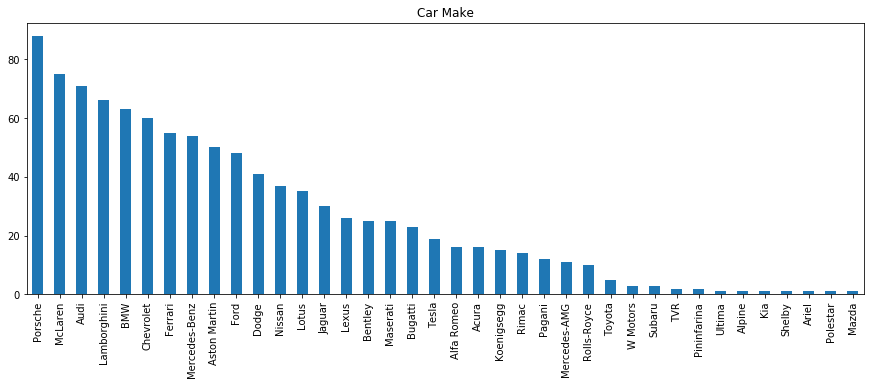

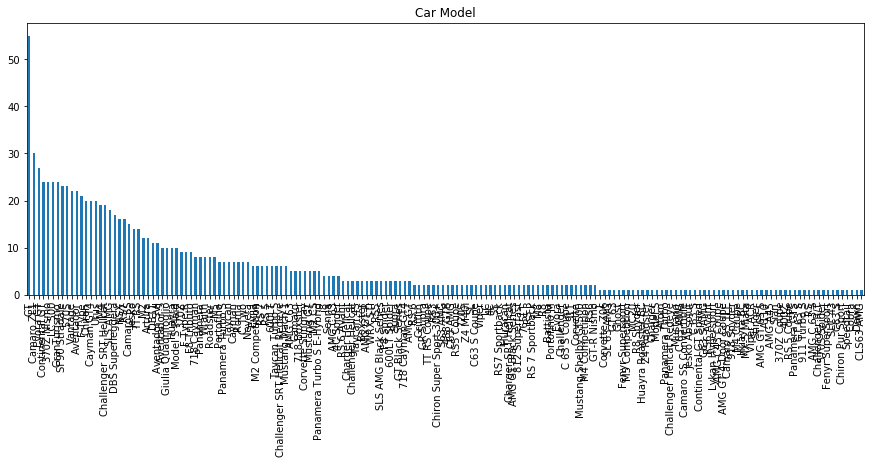

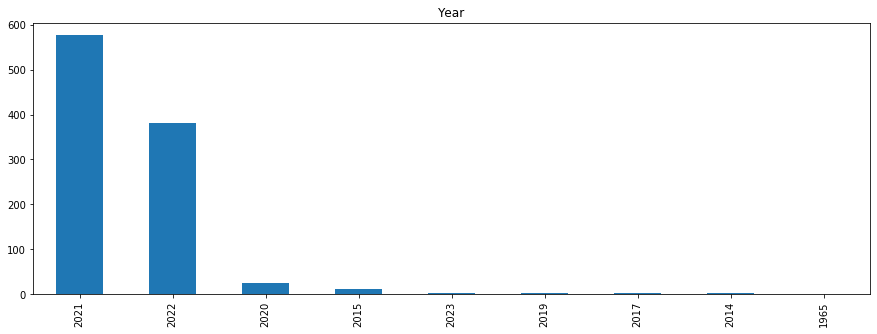

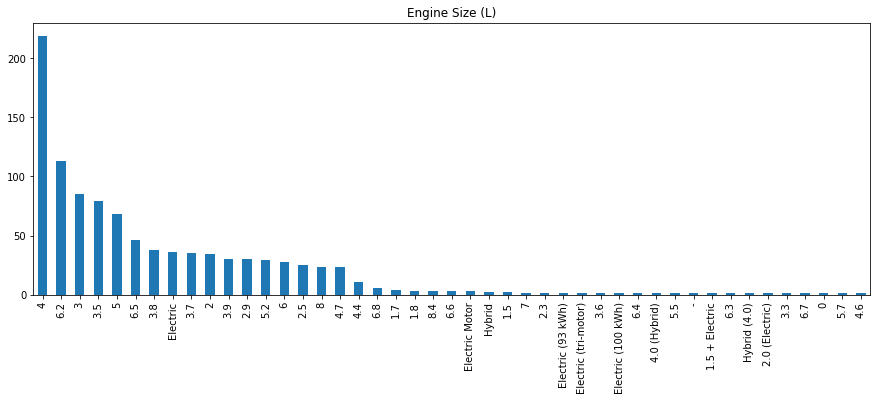

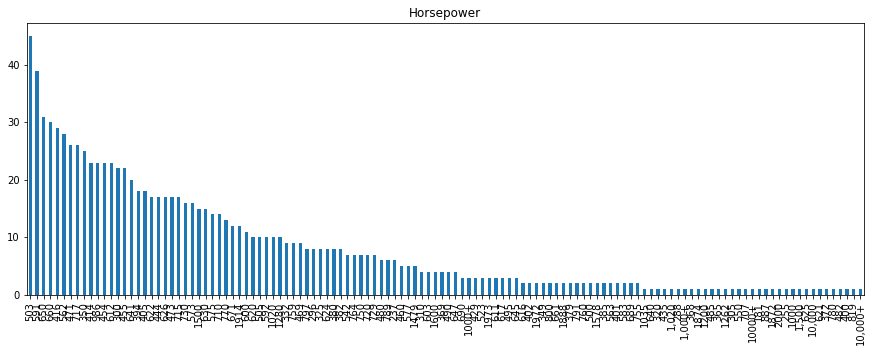

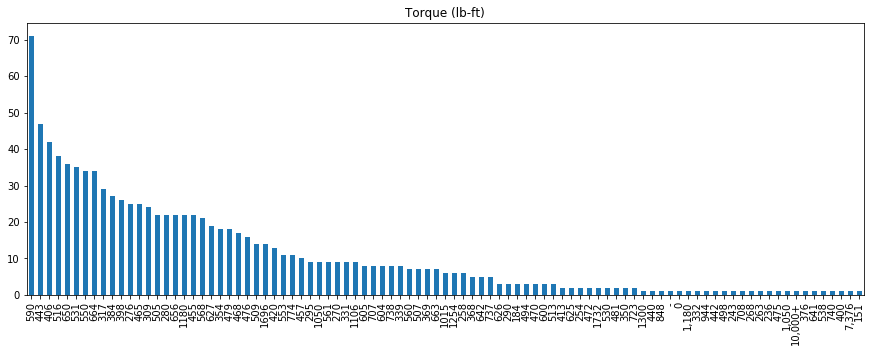

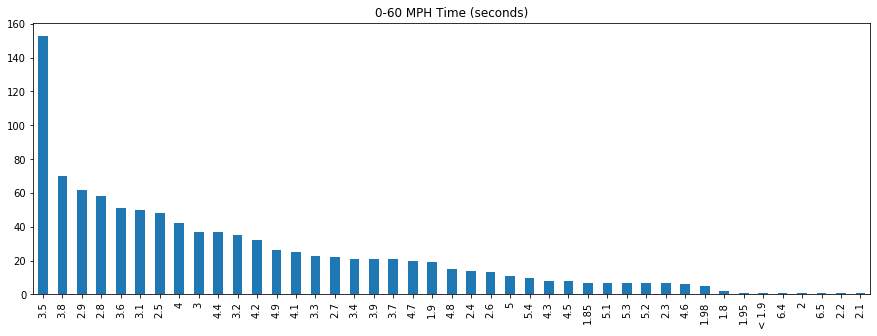

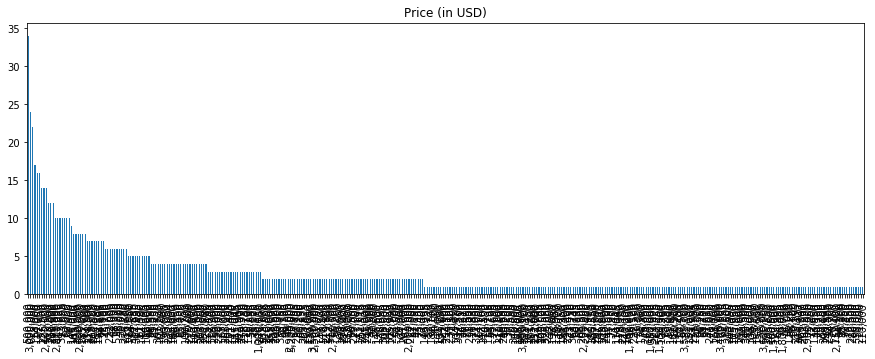

In [6]:
for col in data.columns:
    plt.figure(figsize=(15, 5))
    plt.title(col)
    data[col].value_counts().plot.bar()

In [7]:
EngineSizeindex = data['Engine Size (L)'].value_counts().index
Electricindex = [e for e in EngineSizeindex if "Electric" in e or '-' in e]
Hybridindex = [e for e in EngineSizeindex if "Hybrid" in e ]
Thermicindex = [e for e in EngineSizeindex if "Hybrid" not in e and  "Electric" not in e and '-' not in e]

count_Electric_Cars = data['Engine Size (L)'].value_counts().loc[Electricindex].sum()
count_Hybrid_Cars = data['Engine Size (L)'].value_counts().loc[Hybridindex].sum()
count_Thermic_Cars = data['Engine Size (L)'].value_counts().loc[Thermicindex].sum()

In [8]:
print(f"Thermic_Cars = {count_Thermic_Cars} ")
print(f"Hybrid_Cars = {count_Hybrid_Cars} ")
print(f"Electric_Cars = {count_Electric_Cars} ")
print(f"Total Cars = {count_Electric_Cars+count_Hybrid_Cars+count_Thermic_Cars}")

Thermic_Cars = 948 
Hybrid_Cars = 4 
Electric_Cars = 45 
Total Cars = 997


- Y a des voiture : thermiques, electriques et hybrides

In [9]:
Electricindex

['Electric',
 'Electric Motor',
 'Electric (93 kWh)',
 'Electric (tri-motor)',
 'Electric (100 kWh)',
 '-',
 '1.5 + Electric',
 '2.0 (Electric)']

In [10]:
data[data["Engine Size (L)"].isna()==True]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
168,Rimac,C_Two,2022,NaN,1914,1696,1.9,"2,400,000"
171,Tesla,Model S Plaid,2021,NaN,1020,1050,1.98,"131,190"
222,Porsche,Taycan Turbo S,2021,NaN,750,774,2.6,"185,000"
247,Tesla,Model S Plaid,2022,NaN,1020,1050,1.9,"131,190"
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,"2,400,000"
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,"200,000"
686,Rimac,C_Two,2022,NaN,1914,1696,1.85,"2,400,000"
697,Lotus,Evija,2022,NaN,1972,1254,2.5,"2,700,000"
752,Porsche,Taycan,2022,NaN,469,479,3.8,"79,900"
916,Tesla,Roadster,2022,NaN,"10,000+",NaN,1.9,"200,000"


Les voitures qui nan en Engine size sont des voitures Electriques

### Horsepower

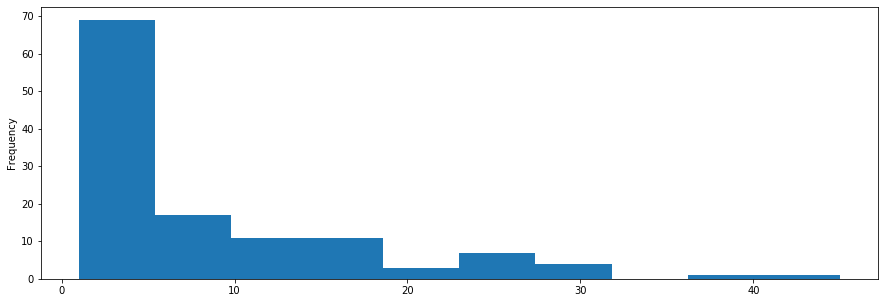

In [11]:
data["Horsepower"].value_counts().plot.hist(figsize=(15,5))

In [12]:
unknown_values = [e for e in data["Horsepower"].value_counts().index if "+" in e]
others = [int(e.replace(',','')) for e in data["Horsepower"].value_counts().index if e not in unknown_values]
unknown_values

['1000+', '1,000+', '10000+', '10,000+']

In [13]:
print('Min Horsepower = ', min(others))
print('Max Horsepower = ', max(others))

Min Horsepower =  181
Max Horsepower =  10000


In [14]:
data['Horsepower'].value_counts().loc[unknown_values].sum()

6

## Torque (lb-ft)

In [15]:
data["Torque (lb-ft)"].value_counts().index

Index(['590', '443', '406', '516', '650', '531', '550', '664', '317', '384',
       '398', '276', '465', '309', '505', '280', '656', '1180', '455', '568',
       '627', '354', '479', '468', '476', '509', '1696', '420', '553', '774',
       '457', '295', '1050', '561', '270', '331', '1106', '605', '707', '604',
       '738', '339', '560', '507', '369', '663', '1015', '1254', '258', '368',
       '642', '737', '626', '290', '184', '494', '470', '600', '513', '413',
       '625', '254', '472', '1732', '530', '481', '350', '723', '1300', '440',
       '848', '-', '0', '1,180', '332', '944', '442', '498', '243', '708',
       '268', '263', '236', '475', '1,050', '10,000+', '376', '641', '538',
       '740', '400', '7,376', '151'],
      dtype='object')

In [16]:
unknown_values = [e for e in data["Torque (lb-ft)"].value_counts().index if "+" in e or '-' in e or e=='0']
others = [int(e.replace(',','')) for e in data["Torque (lb-ft)"].value_counts().index if e not in unknown_values]

In [17]:
unknown_values

['-', '0', '10,000+']

In [18]:
print('Min Torque (lb-ft) = ', min(others))
print('Max Torque (lb-ft) = ', max(others))

Min Torque (lb-ft) =  151
Max Torque (lb-ft) =  7376


In [19]:
data['Torque (lb-ft)'].value_counts().loc[unknown_values].sum()

3

In [20]:
data[data["Torque (lb-ft)"].isna()==True]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
642,Tesla,Model S Plaid,2021,Electric,1020,NaN,1.9,"139,990"
878,Maserati,GranTurismo,2021,Electric,550,NaN,2.8,"200,000"
916,Tesla,Roadster,2022,NaN,"10,000+",NaN,1.9,"200,000"


In [21]:
data[data["Torque (lb-ft)"].isin(unknown_values) ]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
335,Tesla,Roadster,2022,-,1000+,-,1.9,"200,000"
354,Tesla,Roadster,2022,Electric,1000+,"10,000+",1.9,"200,000"
389,Tesla,Roadster,2022,NaN,10000+,0,1.9,"200,000"


## 0-60 MPH Time (seconds)

In [22]:
data[data["0-60 MPH Time (seconds)"].isna()==True].sum()

Car Make                   0.0
Car Model                  0.0
Year                       0.0
Engine Size (L)            0.0
Horsepower                 0.0
Torque (lb-ft)             0.0
0-60 MPH Time (seconds)    0.0
Price (in USD)             0.0
dtype: float64

In [23]:
data["0-60 MPH Time (seconds)"].value_counts()

3.5      153
3.8       70
2.9       62
2.8       58
3.6       51
3.1       50
2.5       48
4         42
3         37
4.4       37
3.2       35
4.2       32
4.9       26
4.1       25
3.3       23
2.7       22
3.4       21
3.9       21
3.7       21
4.7       20
1.9       19
4.8       15
2.4       14
2.6       13
5         11
5.4       10
4.3        8
4.5        8
1.85       7
5.1        7
5.3        7
5.2        7
2.3        7
4.6        6
1.98       5
1.8        2
1.95       1
< 1.9      1
6.4        1
2          1
6.5        1
2.2        1
2.1        1
Name: 0-60 MPH Time (seconds), dtype: int64

In [24]:
unknown_values = [e for e in data["0-60 MPH Time (seconds)"].value_counts().index if "<" in e]
others = [float(e.replace(',','')) for e in data["0-60 MPH Time (seconds)"].value_counts().index if e not in unknown_values]

In [25]:
unknown_values

['< 1.9']

In [26]:
print('Min 0-60 MPH Time (seconds) = ', min(others))
print('Max 0-60 MPH Time (seconds) = ', max(others))

Min 0-60 MPH Time (seconds) =  1.8
Max 0-60 MPH Time (seconds) =  6.5


In [27]:
data[data["0-60 MPH Time (seconds)"].isin(unknown_values) ]

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
364,Tesla,Roadster,2023,Electric,"1,000+",737,< 1.9,"200,000"


### Price (in USD)  

In [28]:
data["Price (in USD)"].value_counts()

500,000      34
3,000,000    24
625,000      22
58,900       17
114,000      16
             ..
280,000       1
99,000        1
56,000        1
211,300       1
110,000       1
Name: Price (in USD), Length: 367, dtype: int64

In [29]:
others = [int(e.replace(',','')) for e in data["Price (in USD)"].value_counts().index ]

In [30]:
print('Min Price (in USD) = ', min(others))
print('Max Price (in USD) = ', max(others))

Min Price (in USD) =  25000
Max Price (in USD) =  5200000
